### **Load the Libraries**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Load Data and Perform Preprocessing**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))


In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
print(df.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### **Drop the unnecessary columns and the NaN values in the ramaining columns**

In [6]:
df = df.drop(['pclass','sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive'], axis=1)
# Remove NaN values
df = df.dropna()

In [7]:
df

,survived,sex,age,fare,alone
0,0,male,22.0,7.2500,False
1,1,female,38.0,71.2833,False
2,1,female,26.0,7.9250,True
3,1,female,35.0,53.1000,False
4,0,male,35.0,8.0500,True
...,...,...,...,...,...
885,0,female,39.0,29.1250,False
886,0,male,27.0,13.0000,True
887,1,female,19.0,30.0000,True
889,1,male,26.0,30.0000,True


In [8]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [9]:
df.alone.unique()

array([False,  True])

In [10]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('sex', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
sex,
female,261
male,453


In [11]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('alone', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
alone,
False,310
True,404


In [12]:
df.info

<bound method DataFrame.info of      survived     sex   age     fare  alone
0           0    male  22.0   7.2500  False
1           1  female  38.0  71.2833  False
2           1  female  26.0   7.9250   True
3           1  female  35.0  53.1000  False
4           0    male  35.0   8.0500   True
..        ...     ...   ...      ...    ...
885         0  female  39.0  29.1250  False
886         0    male  27.0  13.0000   True
887         1  female  19.0  30.0000   True
889         1    male  26.0  30.0000   True
890         0    male  32.0   7.7500   True

[714 rows x 5 columns]>

### **Data inspection**

In [13]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(16,5), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on my graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.survived, df.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the age of passengers with respect to sex
df.age[df.sex == 'male'].plot(kind='kde')    
df.age[df.sex == 'female'].plot(kind='kde')
# plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within sex")
# sets our legend for our graph.
plt.legend(('male', 'female'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.alone.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.alone.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers with respect to being alone or not (True = alone)")

Text(0.5, 1.0, 'Passengers with respect to being alone or not (True = alone)')

### **Exploratory Visualization:**

The point of this assignment is to predict if an individual will survive based on the features in the data like:

*   Sex
*   Age
*   Fare
*   Being alone

Let’s see if we can gain a better understanding of who survived and died.

First I plot a bar graph of those who Survived Vs. Those who did not.



Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

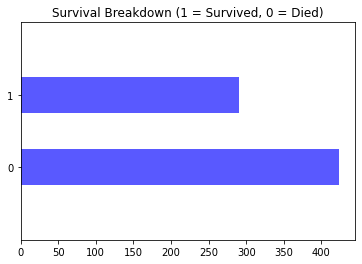

In [14]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

Now I break the previous graph down by gender

(-1.0, 2.0)

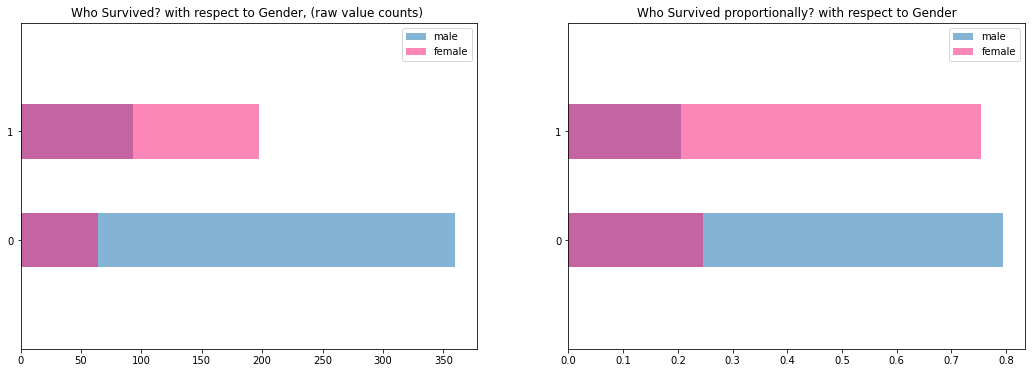

In [15]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.survived[df.sex == 'male'].value_counts().sort_index()
df_female = df.survived[df.sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (25%), than men (20%)



### **Now I encode all the categorical features in the dataset and convert them to integers**

In [16]:
from sklearn.preprocessing import OrdinalEncoder

df['sex'] = OrdinalEncoder().fit_transform(df['sex'].to_numpy().reshape(-1,1))
df['alone'] = OrdinalEncoder().fit_transform(df['alone'].to_numpy().reshape(-1,1))

In [17]:
df

,survived,sex,age,fare,alone
0,0,1.0,22.0,7.2500,0.0
1,1,0.0,38.0,71.2833,0.0
2,1,0.0,26.0,7.9250,1.0
3,1,0.0,35.0,53.1000,0.0
4,0,1.0,35.0,8.0500,1.0
...,...,...,...,...,...
885,0,0.0,39.0,29.1250,0.0
886,0,1.0,27.0,13.0000,1.0
887,1,0.0,19.0,30.0000,1.0
889,1,1.0,26.0,30.0000,1.0


### **Then I split data into training and testing**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['survived']), df['survived'], test_size=0.25, random_state=10)

In [19]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

### **Now I create the logistic regression models**

First I will use statmodels to create the logistic regression models.

### **Model-1**

In [20]:
model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.499554
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  535
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            4
Date:                Sun, 31 Jan 2021   Pseudo R-squ.:                  0.2577
Time:                        17:43:23   Log-Likelihood:                -267.26
converged:                       True   LL-Null:                       -360.06
Covariance Type:            nonrobust   LLR p-value:                 4.675e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9297      0.289      3.221      0.001       0.364       1.495
sex           -2.4057      0.

Predictions  0.0  1.0
Actual               
0             85   18
1             22   54


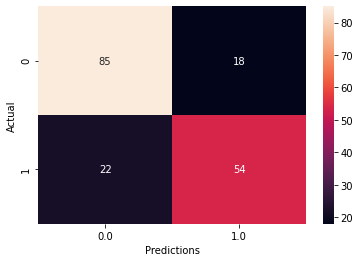

In [21]:
y_hat = results.predict(X_test)
predictions = round(y_hat)

conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predictions'])
print(conf_matrix)

sb.heatmap(conf_matrix, annot=True)
plt.show()

In [23]:
from sklearn.metrics import (accuracy_score) 
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, predictions))

Test accuracy =  0.776536312849162


In [24]:
aic = results.aic
bic = results.bic

print('aic=', aic)
print('bic=',bic)

aic= 544.5230972591512
bic= 565.9344309936313


### **Model-2**

I drop the "alone" columns since it has the highest 'p' value which means it is not statistically significant

In [25]:
model2 = sm.Logit(y_train, X_train.drop(columns=['alone']))
results2 = model2.fit()
print(results2.summary2())

Optimization terminated successfully.
         Current function value: 0.499639
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.258     
Dependent Variable: survived         AIC:              542.6137  
Date:               2021-01-31 17:45 BIC:              559.7428  
No. Observations:   535              Log-Likelihood:   -267.31   
Df Model:           3                LL-Null:          -360.06   
Df Residuals:       531              LLR p-value:      5.6981e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     0.9543     0.2767     3.4490   0.0006    0.4120    1.4967
sex      -2.3891     0.2211   -10.8066   0.0000   -2.8224 

In [26]:
aic2 = results2.aic
bic2 = results2.bic

print('aic2=', aic2)
print('bic2=',bic2)

aic2= 542.6137270186969
bic2= 559.7427940062809


**We can see that the "aic" and "bic" values for the model2 are both smaller whih means the second model had better performance**

Predictions  0.0  1.0
Actual               
0             85   18
1             22   54


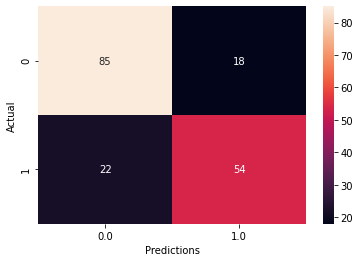

In [27]:
y_hat2 = results2.predict(X_test.drop(columns=['alone']))
predictions2 = round(y_hat2)

conf_matrix2 = pd.crosstab(y_test, predictions2, rownames=['Actual'], colnames=['Predictions'])
print(conf_matrix2)

sb.heatmap(conf_matrix2, annot=True)
plt.show()

In [28]:
from sklearn.metrics import (accuracy_score) 
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, predictions2))

Test accuracy =  0.776536312849162


**We can see that although the aic and bic values for the second model are smaller, but droping the "alone" column did not have a very big effect on the final predictions, since the number of correctly classified and missclassified data points are the same as the fist model**

### **Model-3**

Now I use scikit learn to build a logistic regression model

In [29]:
mdl = LogisticRegression()
mdl.fit(X_train.drop(columns=['const']), y_train)

pred = mdl.predict(X_test.drop(columns=['const']))

Predictions   0   1
Actual             
0            85  18
1            22  54


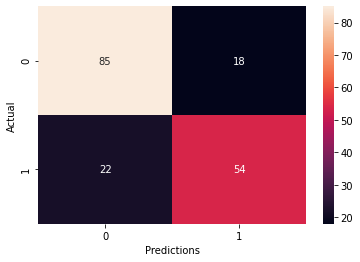

In [30]:
cm = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predictions'])
print(cm)

sb.heatmap(cm, annot=True)
plt.show()

In [31]:
from sklearn.metrics import (accuracy_score) 
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, pred))

Test accuracy =  0.776536312849162


**We can see that the prediction results for the third model which is created by scikit learn is exactly the same as the stat models.**